## __Detecting and Preventing: Overfitting and Underfitting__

## Step 1: Import Required Libraries

- Import the required libraries and functions
- Use an inbuilt data set from sklearn

In [52]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot

import matplotlib.pyplot as plt

- Let's create the X and y variables
by using **make_classification**.

- Create a sample size of 9000 and a feature of 18 with n-information as 4, n-redundant as 12, and  random_state as 42.

42 is just a number and is a seed value,not really important.


In [53]:
X, y = make_classification( n_samples =9000, n_features=18, n_informative=4, n_redundant= 12, random_state=42)

X are features.
y are labels

In [54]:
y

array([0, 0, 0, ..., 0, 1, 0])

__Observation:__

- X and y variable are created.

## Step 2: Split the Dataset into Train and Test Datasets

- Let's split the data into 70 for training and 30 for testing.

 - Create an empty list for **train_scores** and **test_scores**.
 - Create the values. (Here, we are checking for 21 values.)


In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3)

In [56]:
train_scores, test_scores = list(), list()

In [57]:
values = [i for i in range(1,21)]

- Now, let’s create a for loop for the model and decision.

  - Pass the “i” values
  - Check how the model will perform at different depths
  - Fit the model and create a **train_yhat**
  - Predict the model for **X_train**
  - Set the accuracy score for the train
  - Do the same for the test data set
  - Append the values to the empty list
  - Print the output (keep it up to 3 decimal places)


In [58]:
for i in values:
    model = DecisionTreeClassifier(max_depth=i)
    model.fit(X_train, y_train)
    train_yhat = model.predict(X_train)

    train_acc = accuracy_score(y_train, train_yhat)
    #accuracy score is estimated by: train_yhat/y_train


    test_yhat = model.predict(X_test)
    test_acc = accuracy_score(y_test, test_yhat)
    train_scores.append(train_acc)
    test_scores.append(test_acc)
    print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))

>1, train: 0.721, test: 0.729
>2, train: 0.755, test: 0.752
>3, train: 0.849, test: 0.840
>4, train: 0.870, test: 0.857
>5, train: 0.876, test: 0.863


>6, train: 0.884, test: 0.867
>7, train: 0.901, test: 0.876
>8, train: 0.918, test: 0.885
>9, train: 0.930, test: 0.893
>10, train: 0.947, test: 0.907
>11, train: 0.960, test: 0.920
>12, train: 0.969, test: 0.916
>13, train: 0.974, test: 0.916
>14, train: 0.980, test: 0.916
>15, train: 0.984, test: 0.913
>16, train: 0.990, test: 0.913
>17, train: 0.994, test: 0.912
>18, train: 0.995, test: 0.915
>19, train: 0.997, test: 0.913
>20, train: 0.998, test: 0.914


__Observation:__

- We got the accuracy for various train and test data sets.

- Now, let's plot this. 

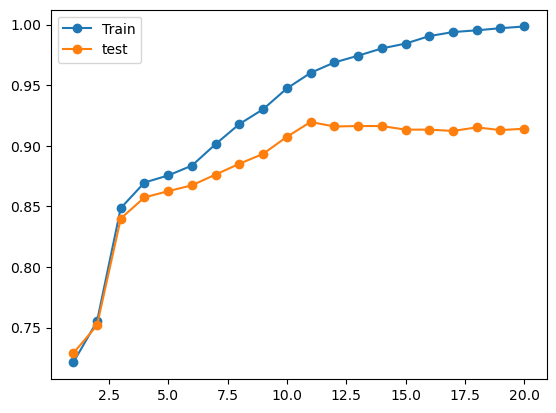

In [59]:
pyplot.plot(values, train_scores, '-o', label='Train')
pyplot.plot(values, test_scores, '-o', label='test')
pyplot.legend()
pyplot.show()

__Observations:__

- Here, you can see that for one depth train, the low accuracy is around 84%
and the test is 82%.


- So, there is scope for improvement with low accuracy.


- Hence, this is referred to as underfitting.


- Whereas in the overfitting problem, you see the depth is 20.


- It is able to predict 100% on the training set, whereas in the test it is performing poorly, at 93.

In this case, the model with depth of 10 or 11 will be a good choice with fair tradeoff between overfitting/underfitting. This is indicated by the gap between training and testing plot lines (blue and yellow).

The blue line is how good the model is improving with the training data, it will always improve (lower bias) as we fit (train) with more input data but we face the risk of overfitting meaning that our model may not perform very accuralety in real-case scenarios as we do more general testing data.

The more training data we fit the model (higher complexity), the better the model gets in predicting training data but, becomes inaccurate with testing data.

## Step 3: Perform Hyperparameter Tuning with GridSearchCV

- Define the parameter grid for GridSearchCV
- Perform hyperparameter tuning using GridSearchCV
- Fit the model with the best parameters
- Evaluate the model on training and test sets


In [60]:
from sklearn.model_selection import GridSearchCV

In [74]:
para_grid = {'criterion' :['gini', 'entropy'], 'max_depth':[2,4,6,10,20], 'min_samples_split':[5,10,20, 50, 100]}
clf= GridSearchCV(DecisionTreeClassifier(), para_grid, cv=3, n_jobs=-1, scoring="accuracy")
clf.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 10, 20],
                         'min_samples_split': [5, 10, 20, 50, 100]},
             scoring='accuracy')

In [75]:
clf.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=20, min_samples_split=5)

Observation:

- The best estimators are entropy, with a max_depth of ten and a min_samples_split of ten.

## Step 4: Compare the Test vs. Train Plot After Hyperparameter Tuning
- Observe the two bars representing the training and testing accuracy scores
-Compare the height of the __Train__ and __Test__ bars to assess the model's performance
- Look for significant differences in accuracy between the training and testing bars, indicating potential overfitting
- Evaluate whether the model has low accuracy scores for both training and testing, indicating underfitting
- Aim for a close match in accuracy between the training and testing bars for a well-performing and well-generalized model
- Use the plot to gain insights into the model's ability to generalize to unseen data after hyperparameter tuning

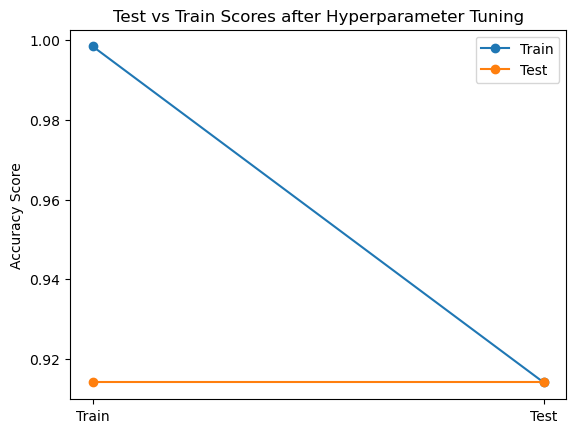

In [63]:
import numpy as np

train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)

# Plot the test vs train scores
values = np.arange(2)

plt.plot(values, [train_score, test_score], '-o', label='Train')
plt.plot(values, [test_score, test_score], '-o', label='Test')
plt.xticks(values, ['Train', 'Test'])
plt.ylabel('Accuracy Score')
plt.title('Test vs Train Scores after Hyperparameter Tuning')
plt.legend()
plt.show()


__Observation:__

- In the above output, we can observe the two bars representing the training and testing accuracy scores after hyperparameter tuning.

- Let's print the accuracy
for both test and train to work on the overfitting problem.


In [64]:
print(accuracy_score(y_train, clf.best_estimator_.predict(X_train)))
print(accuracy_score(y_test, clf.best_estimator_.predict(X_test)))

0.9922222222222222
0.917037037037037


__Observations:__

- Previously, for sample set 10, it was 98%, and the difference was around 4%.
- However, the difference has now been reduced.
- We have to further fine-tune it to make the difference as close as possible.
- That is when we can claim that the overfitting problem has been resolved.
- For underfitting problems, we usually try out different models to increase the accuracy.

That's how we prevent underfitting and overfitting problems.